### Simulate some data

In [1]:
import sys
sys.path.append("..")
from nodegamlss.sklearn import NodeGAMLSS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Generate dataset
N = 5000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3) + np.random.normal(0,0.5, N)
y = (y - np.mean(y)) / np.std(y)
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)



WARNING! The apex is not installed so fp16 is not available.


#### Visualize simulated data

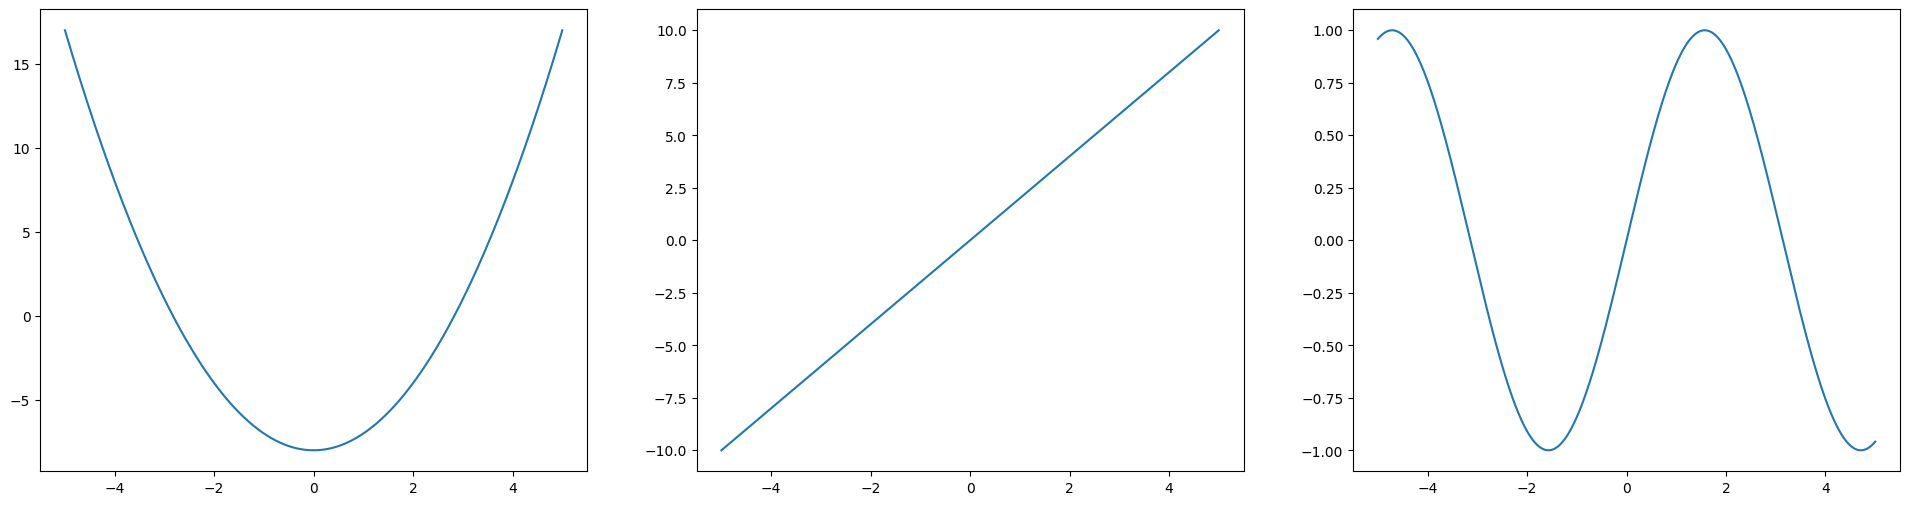

In [2]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## Fit NodeGAMLSS
Use Normal distribution, minimize neg-log-lik

In [3]:
model = NodeGAMLSS(
    in_features=X.shape[1],
    family="normal",
    device="cpu",
    verbose=False,
    max_steps=100,
    lr=0.001,
    report_frequency=100,
    num_trees=75,
    eval_metric="LSS"
)


record = model.fit(X, y)

c:\Users\anton\anaconda3\envs\nodegam_venv\lib\site-packages\qhoptim\pyt\qhadam.py:133: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:1630.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Steps	Train Err	Val Metric (LSS)
100	1.4294	1.508
End. It reaches the maximum steps 100
Total training time: 26.6 seconds
Best step:  100
Best Val Metric:  1.508019208908081
Load the best checkpoint.


# Visualize
 plots are shown in order of distributional parameters as defined by the distribution in torch.distributions. 
 First row thus shows mean, second shows variance (before softplus transformation)

In [4]:
model.visualize_interactive(X)

bin features 0 with uniq val 5000 to only 256
bin features 1 with uniq val 5000 to only 256
bin features 2 with uniq val 5000 to only 256
Finish "Run values through model" in 119ms


100%|██████████| 6/6 [00:00<00:00, 210.68it/s]

Finish "Extract values" in 28ms
Finish "Purify interactions to main effects" in 39ms
Finish "Center main effects" in 0ms



100%|██████████| 7/7 [00:00<00:00, 26.34it/s]


Finish "Construct table" in 277ms
Finish "Run values through model" in 119ms


100%|██████████| 6/6 [00:00<00:00, 176.67it/s]


Finish "Extract values" in 37ms
Finish "Purify interactions to main effects" in 32ms
Finish "Center main effects" in 0ms


100%|██████████| 7/7 [00:00<00:00, 22.27it/s]


Finish "Construct table" in 328ms
Index(['feat_name', 'feat_idx', 'x', 'y', 'importance', 'counts'], dtype='object')


bin features 0 with uniq val 5000 to only 256
bin features 1 with uniq val 5000 to only 256
bin features 2 with uniq val 5000 to only 256
Finish "Run values through model" in 163ms


100%|██████████| 6/6 [00:00<00:00, 140.95it/s]


Finish "Extract values" in 51ms
Finish "Purify interactions to main effects" in 56ms
Finish "Center main effects" in 1ms


100%|██████████| 7/7 [00:00<00:00, 18.40it/s]


Finish "Construct table" in 389ms
Finish "Run values through model" in 176ms


100%|██████████| 6/6 [00:00<00:00, 196.87it/s]


Finish "Extract values" in 37ms
Finish "Purify interactions to main effects" in 61ms
Finish "Center main effects" in 1ms


100%|██████████| 7/7 [00:00<00:00, 13.63it/s]


Finish "Construct table" in 522ms
Index(['feat_name', 'feat_idx', 'x', 'y', 'importance', 'counts'], dtype='object')
Index(['feat_name', 'feat_idx', 'x', 'y', 'importance', 'counts'], dtype='object')


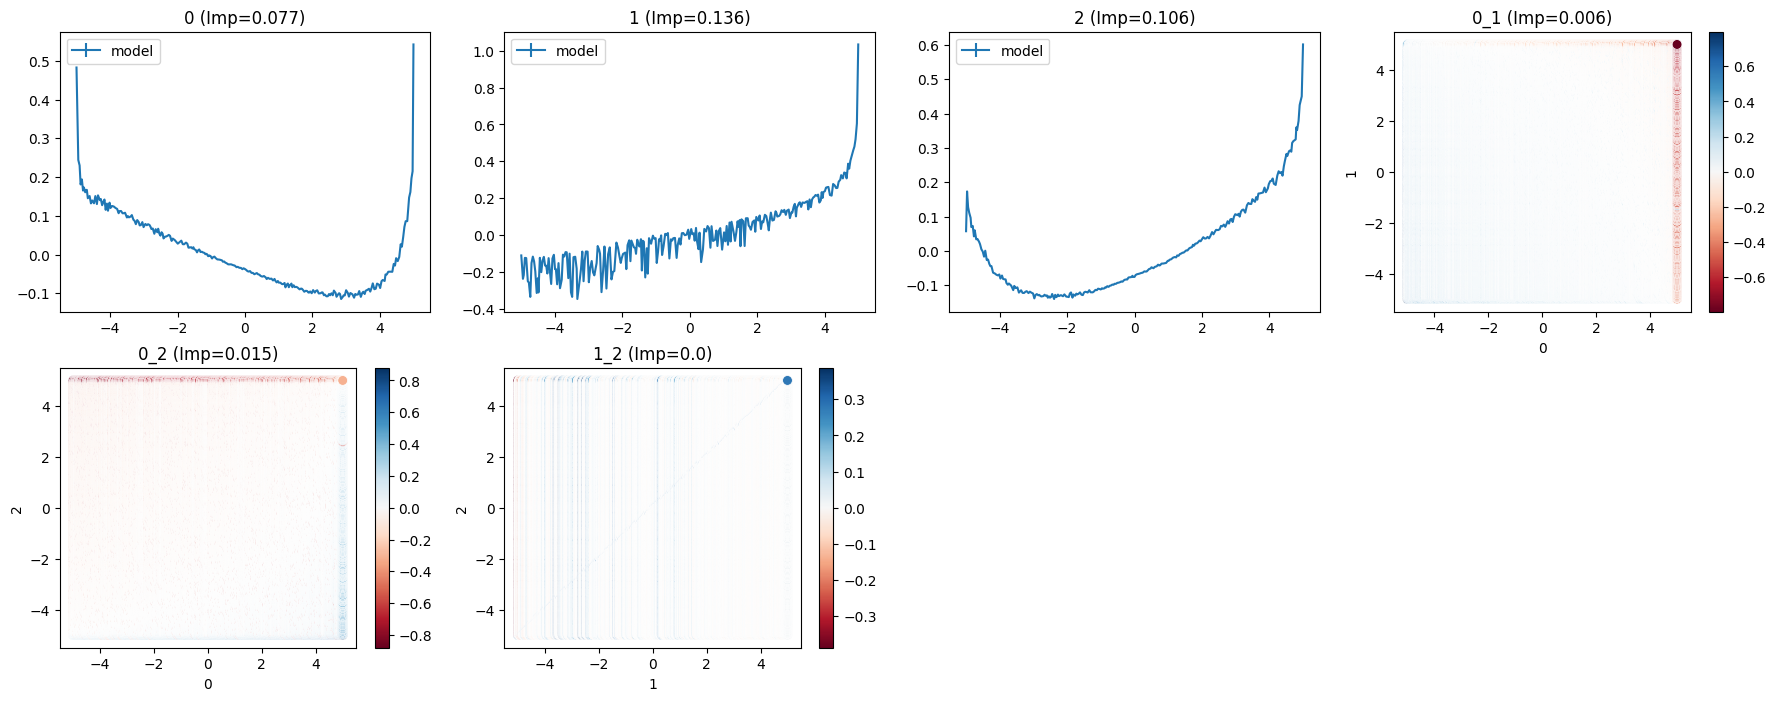

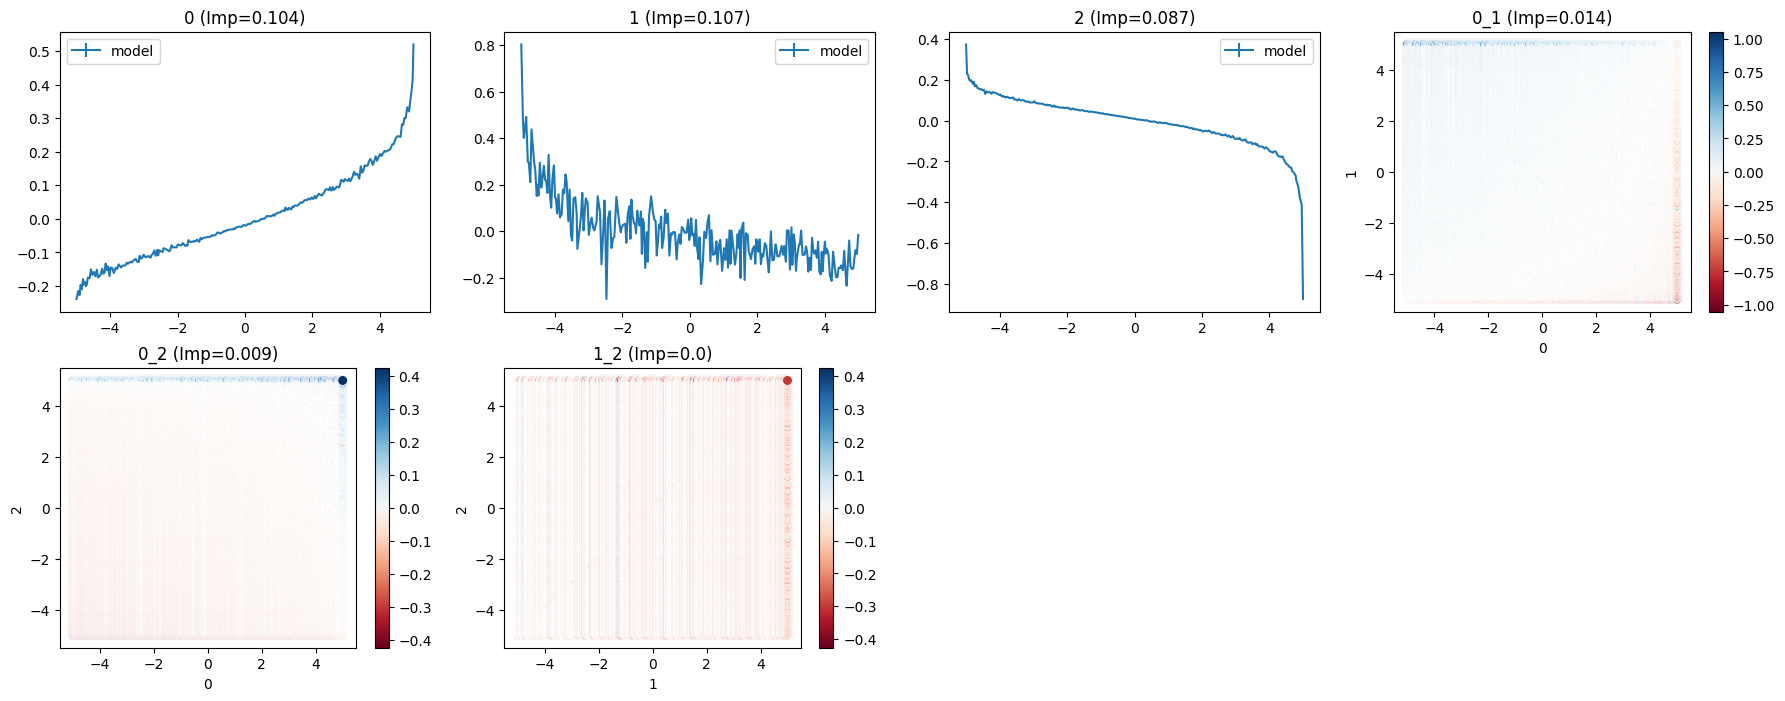

In [4]:
fig, axes, df = model.visualize(X)

## Visualize training loss

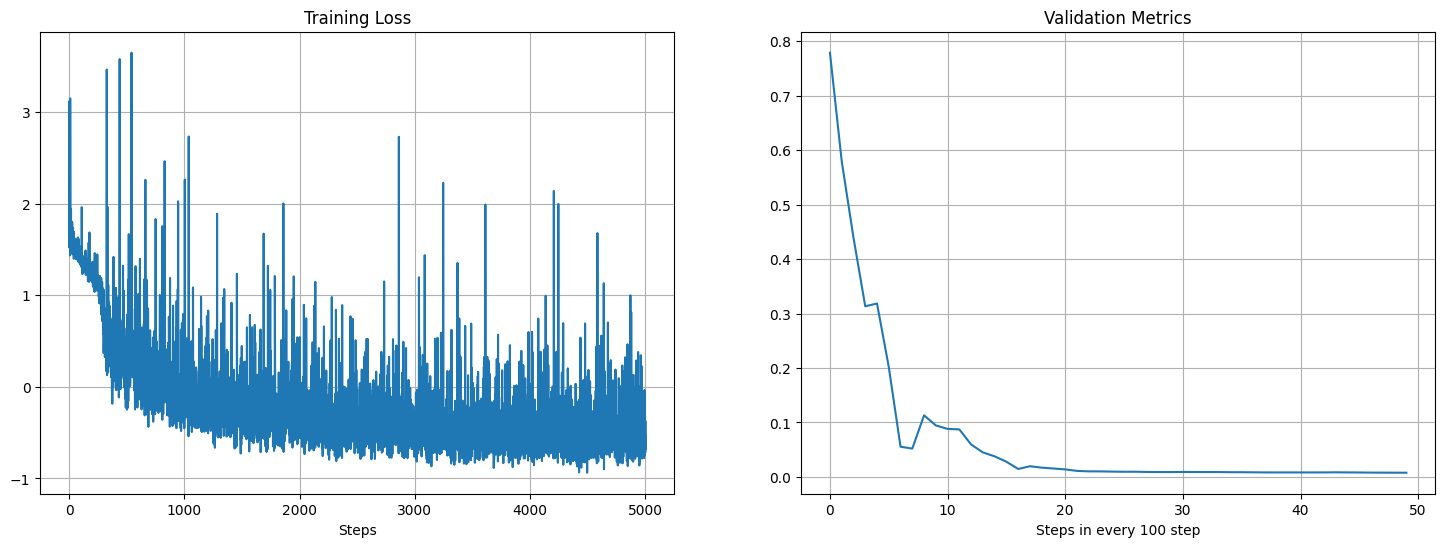

In [ ]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

#### Fit model with MSE as evaluation metrics

In [ ]:
model = NodeGAMLSS(
    in_features=3,
    objective="mse",
    family="poisson",
    device="cpu",
    verbose=False,
    max_steps=200,
    lr=0.0001,
    num_trees=50,
    eval_metric="mse"
)


record = model.fit(X, y)

TypeError: __init__() got an unexpected keyword argument 'objective'

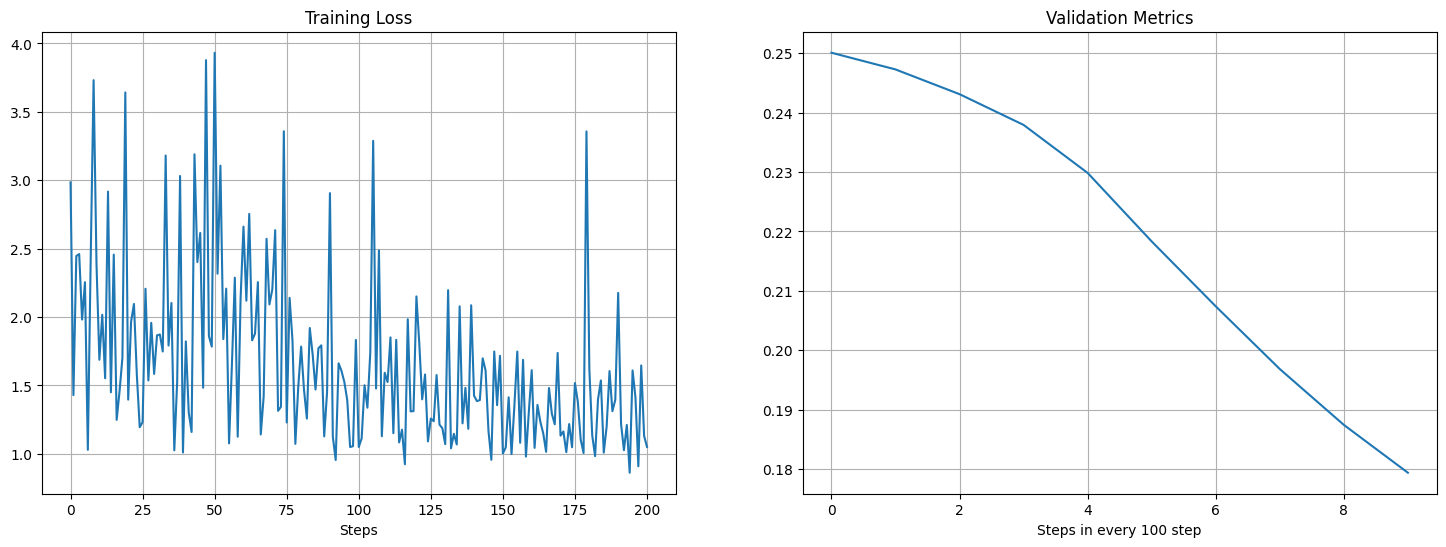

In [ ]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

bin features 0 with uniq val 5000 to only 256
bin features 1 with uniq val 5000 to only 256
bin features 2 with uniq val 4999 to only 256
Finish "Run values through model" in 61ms


100%|██████████| 6/6 [00:00<00:00, 275.15it/s]


Finish "Extract values" in 24ms
Finish "Purify interactions to main effects" in 24ms
Finish "Center main effects" in 0ms


100%|██████████| 7/7 [00:00<00:00, 38.88it/s]


Finish "Construct table" in 184ms


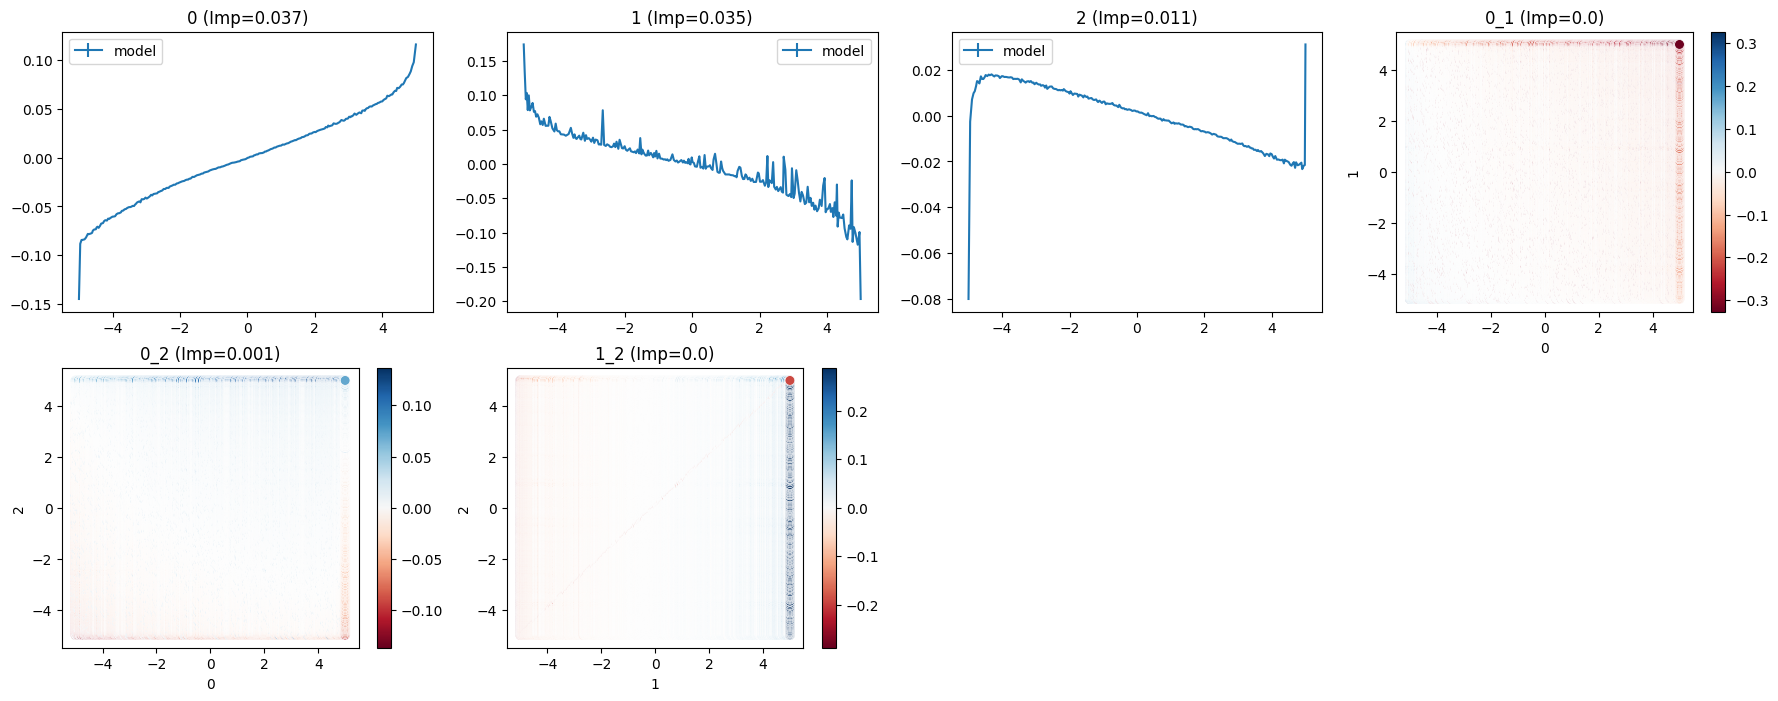

In [ ]:
fig, axes, df = model.visualize(X)